In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pystra as pr
from scipy.stats import genextreme as gev
import scipy.special as sp

In [56]:
class GEVmin(pr.Distribution):
    """GEVmin distribution

    :Attributes:
        - name (str):     Name of the random variable\n
        - loc (float): location parameter or mean\n
        - scale (float): scale parameter or standard deviation\n
        - shape (float): shape parameter
        - input_type (any): Change meaning of loc and scale\n
        - startpoint (float): Start point for seach\n
    """

    def __init__(self, name, loc, scale, shape, input_type=None, startpoint=None):
        if abs(shape) >= 1:
            raise ValueError("Shape parameter ξ must be less than 1 for moments to exist.")
        
        g1 = sp.gamma(1 - shape)
        g2 = sp.gamma(1 - 2*shape)
        
        if input_type is None:
            # mean and stdv passed in
            self.mean = loc
            self.stdv = scale        
            scale = self.stdv * abs(shape) / np.sqrt(g2 - g1 ** 2)
            loc = self.mean - (scale / shape) * (g1 - 1)
        else:
            # loc and scale are actual GEV parameters
            self.mean = loc + (g1 - 1) * scale / shape
            self.stdv = np.sqrt((g2 - g1 ** 2) * (scale / shape) ** 2)     

        # use scipy to do the heavy lifting; note reverse shape sign convention
        self.dist_obj = gev(c=-shape, loc=-loc, scale=scale)

        super().__init__(
            name=name,
            dist_obj=self.dist_obj,
            startpoint=startpoint,
        )

        self.dist_type = "GEVmin"

    def pdf(self, x):
        """
        Probability density function
        """
        return self.dist_obj.pdf(-x)

    def cdf(self, x):
        """
        Cumulative distribution function
        """
        return 1 - self.dist_obj.cdf(-x)

    def ppf(self, u):
        """
        Inverse cumulative distribution function
        """
        x = self.dist_obj.ppf(u)
        return -x

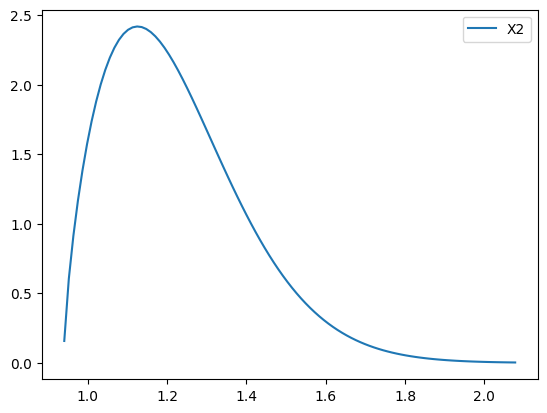

In [57]:
X2 = GEVmin("X2", loc=1.294, scale=0.176, shape=-0.597)
X2.plot();

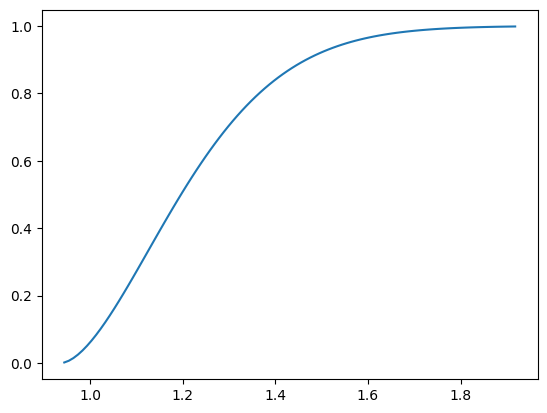

In [58]:
samples = X2.sample()
x = np.linspace(np.min(samples), np.max(samples), 100)
_, ax = plt.subplots()
ax.plot(x, X2.cdf(x))